In [1]:
import csv
import pandas as pd
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy import stats

In [2]:
from statsmodels.graphics.factorplots import interaction_plot

In [3]:
sns.set(font='Yu Gothic')#日本語表記

In [4]:
df = pd.read_csv('data/data.csv',encoding='shift_jis',index_col=0)

In [5]:
df

,sex,when,音韻の引き伸ばしL,フィラーL,語の中断L,語句の繰り返しL,語句の言い直しL,音韻の引き伸ばしR,フィラーR,語の中断R,...,L,R,MeanTimeL,MeanTimeR,MaxL,MaxR,MinL,MinR,RangeL,RangeR
FAOMFUN1,FM,Before,27.0,8.0,2.0,1.0,0.0,37.0,11.0,8.0,...,88,134,1.381906,1.182147,6.680955,4.318000,0.093298,0.108459,6.587657,4.209541
FAOMFUN2,FM,Later,39.0,18.0,12.0,4.0,9.0,11.0,19.0,2.0,...,93,104,1.436839,2.012385,6.465000,8.733000,0.230000,0.172000,6.235000,8.561000
FAOMNAN1,FM,Before,30.0,11.0,7.0,0.0,6.0,40.0,13.0,7.0,...,95,157,1.525689,1.023407,6.747930,5.148886,0.209826,0.126776,6.538105,5.022110
FAOMNAN2,FM,Later,68.0,18.0,7.0,3.0,3.0,8.0,3.0,1.0,...,101,169,0.786508,1.178640,3.574989,5.175828,0.169683,0.007024,3.405306,5.168803
MAKMTKN1,MM,Before,6.0,4.0,0.0,0.0,1.0,28.0,7.0,1.0,...,88,71,1.661307,1.133451,5.598000,4.241000,0.338000,0.228000,5.260000,4.013000
MAKMTKN2,MM,Later,4.0,0.0,0.0,0.0,0.0,34.0,5.0,3.0,...,100,46,1.888630,1.156587,6.592000,3.623000,0.244000,0.290000,6.348000,3.333000
MTKMTTF1,MM,Before,12.0,1.0,0.0,1.0,3.0,57.0,9.0,4.0,...,98,60,2.636724,1.807817,14.358000,5.778000,0.535000,0.280000,13.823000,5.498000
MTKMTTF2,MM,Later,46.0,17.0,6.0,3.0,7.0,0.0,0.0,0.0,...,116,39,2.180741,0.930795,13.831000,3.733000,0.192000,0.216000,13.639000,3.517000


In [28]:
list1=[["FM","Before"], ["FM","Later"], ["FM","Before"],["FM","Later"],["MM","Before"],["MM","Later"],["MM","Before"],["MM","Later"]]
index1 = ['FAOMFUN1', 'FAOMFUN2', 'FAOMNAN1', 'FAOMNAN2', 'MAKMTKN1', 'MAKMTKN2', 'MTKMTTF1', 'MTKMTTF2']
columns1 =["sex", "when"]
data_label = pd.DataFrame(data=list1, index=index1, columns=columns1)

In [31]:
data = pd.concat([data_label,df], axis=1)

In [ ]:
data.to_csv("data/data.csv", encoding="shift_jis")

In [6]:
df

,sex,when,音韻の引き伸ばしL,フィラーL,語の中断L,語句の繰り返しL,語句の言い直しL,音韻の引き伸ばしR,フィラーR,語の中断R,...,L,R,MeanTimeL,MeanTimeR,MaxL,MaxR,MinL,MinR,RangeL,RangeR
FAOMFUN1,FM,Before,27.0,8.0,2.0,1.0,0.0,37.0,11.0,8.0,...,88,134,1.381906,1.182147,6.680955,4.318000,0.093298,0.108459,6.587657,4.209541
FAOMFUN2,FM,Later,39.0,18.0,12.0,4.0,9.0,11.0,19.0,2.0,...,93,104,1.436839,2.012385,6.465000,8.733000,0.230000,0.172000,6.235000,8.561000
FAOMNAN1,FM,Before,30.0,11.0,7.0,0.0,6.0,40.0,13.0,7.0,...,95,157,1.525689,1.023407,6.747930,5.148886,0.209826,0.126776,6.538105,5.022110
FAOMNAN2,FM,Later,68.0,18.0,7.0,3.0,3.0,8.0,3.0,1.0,...,101,169,0.786508,1.178640,3.574989,5.175828,0.169683,0.007024,3.405306,5.168803
MAKMTKN1,MM,Before,6.0,4.0,0.0,0.0,1.0,28.0,7.0,1.0,...,88,71,1.661307,1.133451,5.598000,4.241000,0.338000,0.228000,5.260000,4.013000
MAKMTKN2,MM,Later,4.0,0.0,0.0,0.0,0.0,34.0,5.0,3.0,...,100,46,1.888630,1.156587,6.592000,3.623000,0.244000,0.290000,6.348000,3.333000
MTKMTTF1,MM,Before,12.0,1.0,0.0,1.0,3.0,57.0,9.0,4.0,...,98,60,2.636724,1.807817,14.358000,5.778000,0.535000,0.280000,13.823000,5.498000
MTKMTTF2,MM,Later,46.0,17.0,6.0,3.0,7.0,0.0,0.0,0.0,...,116,39,2.180741,0.930795,13.831000,3.733000,0.192000,0.216000,13.639000,3.517000


In [ ]:
sns.set(font='Hiragino Sans')
pg = sns.pairplot(df)
print(type(pg))

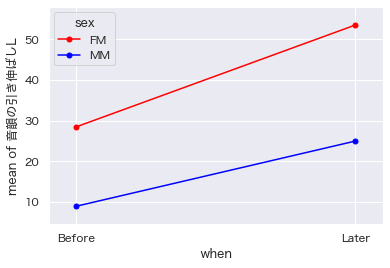

In [45]:
fig = interaction_plot(df.when,df.sex,df["音韻の引き伸ばしL"], colors=['red', 'blue'], ms=10)